In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dtype, int64, float64
from pandas import DataFrame, Int64Dtype
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import MDS
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [2]:
def row_to_intenum(row: [str]) -> [int]:
    row_unique_values = list(set(row))
    mapping = {key: value for value, key in enumerate(row_unique_values)}

    return list(map(lambda item: mapping[item], row))


In [3]:
def optimize_csv(csv: DataFrame):
    for column_alias in csv:
        current_column = csv[column_alias]

        if current_column.dtypes is np.dtype(object):
            csv[column_alias] = normalize(np.array(row_to_intenum(current_column))[:, np.newaxis], axis=0).ravel()

        elif current_column.dtypes is np.dtype(int64) or current_column.dtypes is np.dtype(float64):
            csv[column_alias] = normalize(np.array(current_column)[:, np.newaxis], axis=0).ravel()

In [26]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
data = pd.read_csv('res/adult.data')

data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education num',
                'marital status', 'occupation', 'relationship', 'raсe', 'sex',
                '+capital', '-capital', 'work/hrs', 'native country', 'state']


In [6]:
data

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,raсe,sex,+capital,-capital,work/hrs,native country,state
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
optimize_csv(data)
data

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,raсe,sex,+capital,-capital,work/hrs,native country,state
0,0.006771,0.00000,0.002126,0.008644,0.006925,0.002243,0.003486,0.008084,0.000000,0.000000,0.000000,0.0,0.001704,0.005594,0.00636
1,0.005146,0.00358,0.005503,0.002881,0.004794,0.013458,0.000697,0.000000,0.000000,0.000000,0.000000,0.0,0.005243,0.005594,0.00636
2,0.007178,0.00358,0.005990,0.004034,0.003729,0.002243,0.000697,0.008084,0.017071,0.000000,0.000000,0.0,0.005243,0.005594,0.00636
3,0.003792,0.00358,0.008636,0.008644,0.006925,0.002243,0.005577,0.006467,0.017071,0.009635,0.000000,0.0,0.005243,0.000215,0.00636
4,0.005011,0.00358,0.007263,0.007491,0.007458,0.002243,0.003486,0.006467,0.000000,0.009635,0.000000,0.0,0.005243,0.005594,0.00636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.003656,0.00358,0.006566,0.006339,0.006392,0.002243,0.004880,0.006467,0.000000,0.009635,0.000000,0.0,0.004981,0.005594,0.00636
32556,0.005417,0.00358,0.003940,0.002881,0.004794,0.002243,0.006275,0.008084,0.000000,0.000000,0.000000,0.0,0.005243,0.005594,0.00000
32557,0.007855,0.00358,0.003877,0.002881,0.004794,0.006729,0.004183,0.003233,0.000000,0.009635,0.000000,0.0,0.005243,0.005594,0.00636
32558,0.002979,0.00358,0.005142,0.002881,0.004794,0.000000,0.004183,0.001617,0.000000,0.000000,0.000000,0.0,0.002621,0.005594,0.00636


In [8]:
def remove_column_if_exist(data, *cols):
    for col in cols:
        if col in data:
            del data[col]
remove_column_if_exist(data, 
                       'native country', # too much noise and addicted of material status
                       'raсe', # not enought data
                       'education') # already addicted of ed-time

In [9]:
data

,age,workclass,fnlwgt,education num,marital status,occupation,relationship,sex,+capital,-capital,work/hrs,state
0,0.006771,0.00000,0.002126,0.006925,0.002243,0.003486,0.008084,0.000000,0.000000,0.0,0.001704,0.00636
1,0.005146,0.00358,0.005503,0.004794,0.013458,0.000697,0.000000,0.000000,0.000000,0.0,0.005243,0.00636
2,0.007178,0.00358,0.005990,0.003729,0.002243,0.000697,0.008084,0.000000,0.000000,0.0,0.005243,0.00636
3,0.003792,0.00358,0.008636,0.006925,0.002243,0.005577,0.006467,0.009635,0.000000,0.0,0.005243,0.00636
4,0.005011,0.00358,0.007263,0.007458,0.002243,0.003486,0.006467,0.009635,0.000000,0.0,0.005243,0.00636
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.003656,0.00358,0.006566,0.006392,0.002243,0.004880,0.006467,0.009635,0.000000,0.0,0.004981,0.00636
32556,0.005417,0.00358,0.003940,0.004794,0.002243,0.006275,0.008084,0.000000,0.000000,0.0,0.005243,0.00000
32557,0.007855,0.00358,0.003877,0.004794,0.006729,0.004183,0.003233,0.009635,0.000000,0.0,0.005243,0.00636
32558,0.002979,0.00358,0.005142,0.004794,0.000000,0.004183,0.001617,0.000000,0.000000,0.0,0.002621,0.00636


In [10]:
k_means = KMeans() # clear inner k nearest neighbors clustering (k=8)
k_means.fit(data)
k_means.inertia_

1.472246719919636

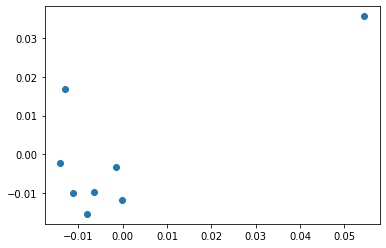

In [11]:
embedding = MDS(n_components=2)
x = embedding.fit_transform(k_means.cluster_centers_)
print(k_means.cluster_centers_)
plt.scatter(x[:, 0], x[:, 1])

In [12]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

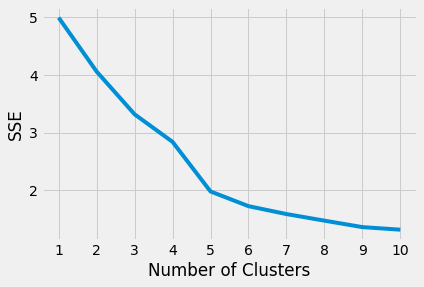

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [16]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Using auto-detecation for elbow method below, kl is =", kl.elbow)

Using auto-detecation for elbow method below, kl is = 5


In [22]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

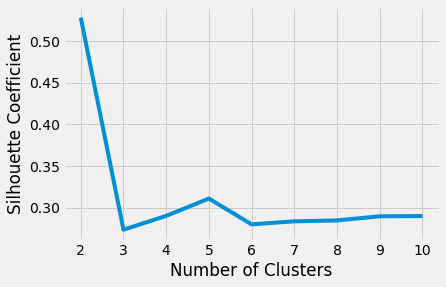

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [24]:
k_means = KMeans(n_clusters=5, random_state=0) # clear inner k nearest neighbors clustering (k=5)
k_means.fit(data)
k_means.inertia_

1.9777008543804306

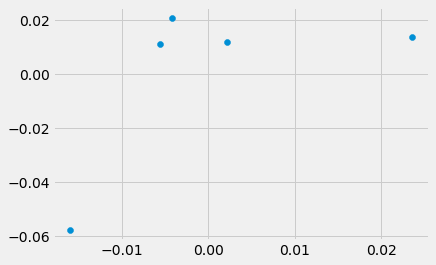

In [25]:
embedding = MDS(n_components=2)
x = embedding.fit_transform(k_means.cluster_centers_)
plt.scatter(x[:, 0], x[:, 1])

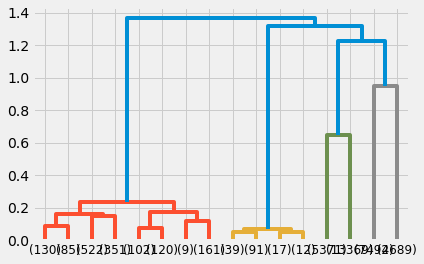

In [30]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)
plot_dendrogram(model, truncate_mode='level', p=3)